# Lab 2
## Statistical Inference
1/23/2018

## 0-Preamble
It's good practice to start each script with a standard set of commands.

In [1]:
  # Clear Environment 
  rm(list = ls())
  # Clear Console
  cat('\014')
  
  # Set working directory to the location of your data files/
 # setwd("/home/jovyan/mba217-2/Data")
  
  
  # A very useful R package for data transformation and manipulation
  library(dplyr)
  # Plotting system for R
  library(ggplot2)
  # For VIF
  library(car)
  # For the Breusch-Pagan test
  library(lmtest)

  # read file
  EPH_2006 <- read.csv("../Data/EPH_2006.csv")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
head(EPH_2006, 3)

id,age,male,eduyears,employed,income
1,55,0,14.0,1,1000
1,26,0,14.0,1,1200
2,34,1,12.5,1,NA


## 1-Descriptive Statistics
We'll use some commands from the previous lab to describe the data, and also some new ones.

In [3]:
  # Descriptive statistics of the data - for every column
  summary(EPH_2006)
  # Compact display of the structure of the data
  str(EPH_2006)
  

       id             age             male           eduyears        employed
 Min.   :    1   Min.   :12.00   Min.   :0.0000   Min.   : 3.50   Min.   :1  
 1st Qu.: 9358   1st Qu.:28.00   1st Qu.:0.0000   1st Qu.: 7.00   1st Qu.:1  
 Median :18635   Median :38.00   Median :1.0000   Median :12.50   Median :1  
 Mean   :18657   Mean   :39.47   Mean   :0.5842   Mean   :11.24   Mean   :1  
 3rd Qu.:27933   3rd Qu.:49.00   3rd Qu.:1.0000   3rd Qu.:14.00   3rd Qu.:1  
 Max.   :37521   Max.   :98.00   Max.   :1.0000   Max.   :17.00   Max.   :1  
                                                                             
     income     
 Min.   :    3  
 1st Qu.:  440  
 Median :  800  
 Mean   : 1117  
 3rd Qu.: 1400  
 Max.   :51370  
 NA's   :5623   

'data.frame':	49663 obs. of  6 variables:
 $ id      : int  1 1 2 2 3 4 4 4 5 5 ...
 $ age     : int  55 26 34 37 24 47 21 29 47 22 ...
 $ male    : int  0 0 1 0 0 0 1 1 0 1 ...
 $ eduyears: num  14 14 12.5 17 12.5 12.5 17 17 17 17 ...
 $ employed: int  1 1 1 1 1 1 1 1 1 1 ...
 $ income  : int  1000 1200 NA NA 150 300 930 930 590 900 ...


In [4]:
# Descriptive statistics of Income by different categories of eduyears
  # mean
  aggregate(income ~ eduyears, data=EPH_2006, mean)
  # equivalent solution
  group_by(EPH_2006, eduyears) %>% summarise(mean_income = mean(income, na.rm = T)) %>% ungroup
  # count of rows 
  aggregate(income~eduyears, data=EPH_2006, length)
  # Std error of mean = std. deviation/square root of n
  aggregate(income~eduyears, data=EPH_2006, function(x)sd(x)/sqrt(length(x)))
  # min
  aggregate(income~eduyears, data=EPH_2006, min)
  # max
  aggregate(income~eduyears, data=EPH_2006, max)

eduyears,income
3.5,602.9220
7.0,792.4077
9.5,888.3266
12.5,1142.2766
14.0,1210.7698
17.0,1872.6635


eduyears,mean_income
3.5,602.9220
7.0,792.4077
9.5,888.3266
12.5,1142.2766
14.0,1210.7698
17.0,1872.6635


eduyears,income
3.5,3039
7.0,9503
9.5,8231
12.5,10055
14.0,5629
17.0,7583


eduyears,income
3.5,10.304175
7.0,8.550399
9.5,9.866757
12.5,11.295610
14.0,15.956054
17.0,19.154474


eduyears,income
3.5,6
7.0,10
9.5,3
12.5,10
14.0,10
17.0,20


eduyears,income
3.5,11270
7.0,37000
9.5,22000
12.5,51370
14.0,30000
17.0,42700


You can also save conditional means as a variable in the dataset using the line of code below. The "na." option indicates how missing values will be handled.  "na.rm" indicates that the mean will be calculated excluding missing values.  

In [5]:
# Save conditional mean as a variable 
 EPH_2006 <- EPH_2006 %>% group_by(eduyears) %>% mutate(meanincome = mean(income, na.rm = TRUE)) %>% ungroup
  # EPH_2006 %>% group_by(eduyears) %>% summarise(meanincome = mean(income, na.rm = TRUE))
 
  # rename meanincome to Conditional_Mean_Income
  # colnames(EPH_2006)[which(colnames(EPH_2006) == 'meanincome')] <- 'Conditional_Mean_Income'
 names(EPH_2006)[length(EPH_2006)] <- 'Conditional_Mean_Income'

In [6]:
# EPH_2006$uniqrecord <- EPH_2006 %>% group_indices(eduyears)
# OR
EPH_2006 <- EPH_2006 %>% mutate(uniqrecord = group_indices(EPH_2006, eduyears))

In [7]:
unique(EPH_2006[, c("eduyears", "uniqrecord")])

eduyears,uniqrecord
14.0,5
12.5,4
17.0,6
9.5,3
7.0,2
3.5,1


In [8]:
head(EPH_2006, 3)

id,age,male,eduyears,employed,income,Conditional_Mean_Income,uniqrecord
1,55,0,14.0,1,1000,1210.770,5
1,26,0,14.0,1,1200,1210.770,5
2,34,1,12.5,1,NA,1142.277,4


Now, let's generate some graphs to visualize the conditional means.  You'll use these plots to answer the following homework question: 
Exercise 2.1 From the regression output in Figure 4, state the relationship between income and  years of education – is it increasing or decreasing, and at what rate? Also assess whether this association is statistically significant. Comment on whether you would conclude that more  education causes increase in the income levels of individuals.

In [9]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width = 4, repr.plot.height = 3)

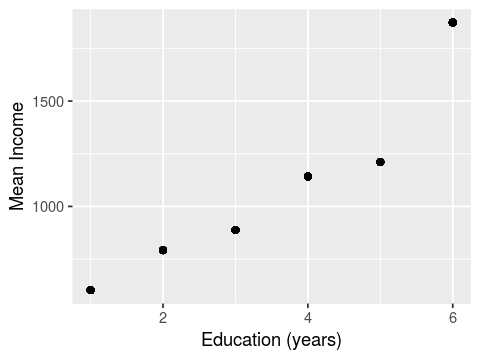

In [10]:
 #Plot the mean income per group
  p <- EPH_2006 %>% ggplot(aes(uniqrecord, Conditional_Mean_Income)) 
  p + geom_point() +
    xlab("Education (years)") +
    ylab("Mean Income")

Warning message:
“Removed 10690 rows containing missing values (geom_point).”

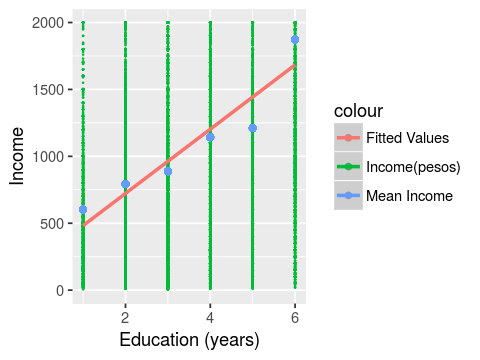

In [11]:
 # Plot income, mean income per group and fit a line to the mean income
  p <- EPH_2006 %>% ggplot(aes(uniqrecord))
  p + geom_point(aes(y=income, color="Income(pesos)"), size = 0.1) + 
    geom_point(aes(y=Conditional_Mean_Income, color="Mean Income")) + 
    ylim(0,2000) +
    geom_smooth(aes(y=Conditional_Mean_Income, color="Fitted Values"), method='lm') +
    xlab("Education (years)") + ylab("Income")

# 2-Distributions & Central Limit Theorem
You can also use ggplot to graph distributions with different parameters.  See today's lab readings for further detail

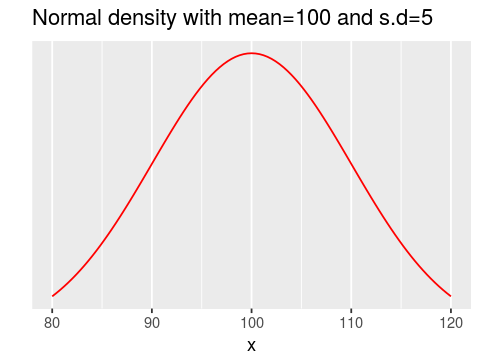

In [12]:
  # Normal Distribution
  normal <- ggplot(data.frame(x = c(80, 120)), aes(x)) +
    stat_function(fun = dnorm, args = list(mean = 100, sd = 10), colour = "red") + ylab("") +
    scale_y_continuous(breaks = NULL) + 
    ggtitle("Normal density with mean=100 and s.d=5")
  normal

Here, we are going to demonstrate that taking multiple sample means from random samples of a uniformly distributed variable produces a normal distribution. The Central Limit Theorem (CLT) states that the sampling distribution of the sample mean is approximately normally distributed, regardless of the distribution of the underlying random sample.

First we set the seed, so R produces random numbers in the same way so that results are replicable. It is always a good idea to set a seed.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    4.00    3.68    5.00    6.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.475   5.000   6.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   3.507   5.000   6.000 

[1] 4 5 5 4 5 3 6 3 4 6 5 6 3 1 1 2 5 2 5 3 1 1 4 4 5 1 3 4 5 4 4 1 1 6 2 6 3
 [38] 5 4 5 3 5 5 5 2 4 1 3 1 5 4 3 5 2 5 5 4 2 1 4 3 1 2 3 5 1 6 5 5 3 1 2 3 2
 [75] 6 4 4 2 1 2 3 3 4 2 5 2 4 2 3 3 4 2 2 5 4 5 4 3 3 4 4 5 2 1 2 1 6 5 1 4 4
[112] 4 3 5 3 4 4 6 5 5 4 2 2 4 4 2 4 6 3 3 6 1 2 2 3 1 3 1 5 5 4 5 4 4 6 5 1 6
[149] 6 4 5 6 5 3 1 2 2 5 3 2 3 4 1 1 1 4 4 2 4 4 1 1 6 1 6 1 1 3 3 4 3 3 6 5 1
[186] 2 6 1 3 1 1 5 6 2 3 6 4 4 1 5

[1] 3.635

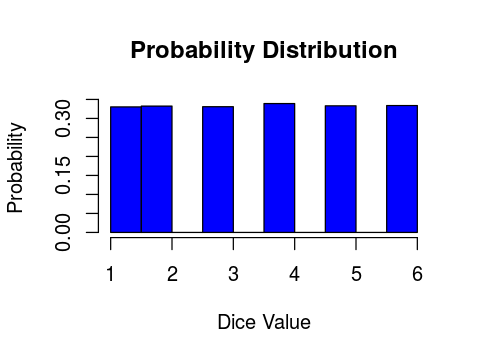

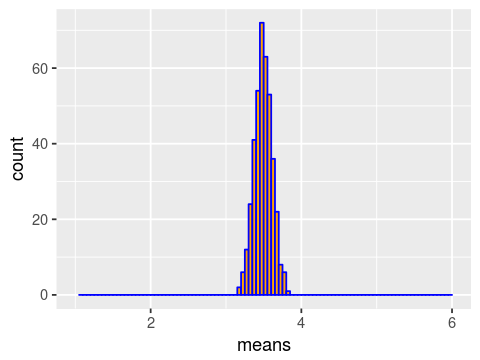

In [13]:
  set.seed(3254)
  
  dice_rolls_100 <- as.integer(runif(100, 1, 7))
  summary(dice_rolls_100)
  
  dice_rolls_1000 <- as.integer(runif(1000, 1, 7))
  summary(dice_rolls_1000)
  
  dice_rolls_50000 <- as.integer(runif(50000, 1, 7))
  summary(dice_rolls_50000)
  
  # Probability distribution 
  hist(dice_rolls_50000, freq = FALSE, col = 'blue', main='Probability Distribution', xlab='Dice Value', ylab='Probability')
  
  # Central Limit Theorem
  
  # How to Sample from a vector
  sample(dice_rolls_50000, 200)
  mean(sample(dice_rolls_50000, 200))
  
  # For CLT, we have to do this 400 times and store it in a data frame
  # doing this using replicate
  sampleMeans <- as.data.frame(replicate(400, mean(sample(dice_rolls_50000, 200))))
  colnames(sampleMeans) <- c('means')
  ggplot(sampleMeans, aes(means)) + geom_histogram(breaks=seq(1,6,0.05), fill="orange", color="blue") +
    xlim(1,6) 


# 3-Hypothesis Test
The critical t-value for a distribution with degrees of freedom of (174 – 2 =) 172 for a two sided test at significance level of 5% can be displayed by the following R command:

In [14]:
  qt(0.95, 172)

  # the t.test function asssumes unequal variances
  # t.test(EPH_2006$income ~ EPH_2006$male, var.equal = TRUE)
  t.test(income ~ male, data = EPH_2006, var.equal = T)

[1] 1.653761


	Two Sample t-test

data:  income by male
t = -29.284, df = 44038, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -356.7625 -312.0019
sample estimates:
mean in group 0 mean in group 1 
       923.1541       1257.5363 


In [15]:
t.test(income ~ male, data = EPH_2006)


	Welch Two Sample t-test

data:  income by male
t = -31.056, df = 43801, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -355.4855 -313.2789
sample estimates:
mean in group 0 mean in group 1 
       923.1541       1257.5363 


Work on Exercises 2.1-2.3 before next lab! You should submit a Jupyter notebook file through Bcourses.  Due February 7th.

